In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

import healpy as hp
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db



In [30]:
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rcParams['axes.labelsize'] = 16

In [31]:
# load opsim database
dbpath = "/home/idies/workspace/lsst_cadence/FBS_1.5/"  # path to all opsim databases

# output directory
outDir = '/home/idies/workspace/Temporary/lixl/scratch/outDir'
resultsDb = db.ResultsDb(outDir=outDir)



In [32]:
# get the name of all opsim dbs 
import glob

workpath = os.getcwd()
os.chdir(dbpath)  # change to opsim database directory
dblist_all = glob.glob('*.db') 
# workpath = '/home/idies/workspace/Storage/lixl/persistent/LSST_OpSim/unknowns/timeGaps'
os.chdir(workpath) # change back to work directory
dblist_all.sort()



In [33]:
dblist_all

['agnddf_v1.5_10yrs.db',
 'alt_dust_v1.5_10yrs.db',
 'alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db',
 'baseline_2snaps_v1.5_10yrs.db',
 'baseline_samefilt_v1.5_10yrs.db',
 'baseline_v1.5_10yrs.db',
 'bulges_bs_v1.5_10yrs.db',
 'bulges_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_bs_v1.5_10yrs.db',
 'bulges_cadence_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_i_heavy_v1.5_10yrs.db',
 'bulges_i_heavy_v1.5_10yrs.db',
 'daily_ddf_v1.5_10yrs.db',
 'dcr_nham1_ug_v1.5_10yrs.db',
 'dcr_nham1_ugr_v1.5_10yrs.db',
 'dcr_nham1_ugri_v1.5_10yrs.db',
 'dcr_nham2_ug_v1.5_10yrs.db',
 'dcr_nham2_ugr_v1.5_10yrs.db',
 'dcr_nham2_ugri_v1.5_10yrs.db',
 'descddf_v1.5_10yrs.db',
 'filterdist_indx1_v1.5_10yrs.db',
 'filterdist_indx2_v1.5_10yrs.db',
 'filterdist_indx3_v1.5_10yrs.db',
 'filterdist_indx4_v1.5_10yrs.db',
 'filterdist_indx5_v1.5_10yrs.db',
 'filterdist_indx6_v1.5_10yrs.db',
 'filterdist_indx7_v1.5_10yrs.db',
 'filterdist_indx8_v1.5_10yrs.db',
 'footprint_add_mag_cloudsv1.5_10yrs.db',
 'footprint_big_sky_d

In [34]:
dataRaw = pd.read_pickle(outDir+'/tgaps_dataRaw.pkl',)

#dataRaw = pd.read_pickle(outDir+'/tgaps_dataRaw_LMC.pkl',)
#dataRaw = pd.read_pickle(outDir+'/tgaps_dataRaw_SMC.pkl',)
#dataRaw = pd.read_pickle(outDir+'/tgaps_dataRaw_SMC.pkl',)

In [35]:
dataRaw.head(1)

,uu,ug,ur,ui,uz,uy,gg,gr,gi,gz,...,rr,ri,rz,ry,ii,iz,iy,zz,zy,yy
agnddf_v1.5_10yrs.db,pixId Dkl FoM_i Nv 0 1...,pixId Dkl FoM_i Nv 0 137...,pixId Dkl FoM_i Nv 0 137...,pixId Dkl FoM_i Nv 0 137...,pixId Dkl FoM_i Nv 0 1376 NaN ...,pixId Dkl FoM_i Nv 0 1376 NaN ...,pixId Dkl FoM_i Nv 0 1...,pixId Dkl FoM_i Nv 0 1...,pixId Dkl FoM_i Nv 0 137...,pixId Dkl FoM_i Nv 0 137...,...,pixId Dkl FoM_i Nv 0 ...,pixId Dkl FoM_i Nv 0 1...,pixId Dkl FoM_i Nv 0 137...,pixId Dkl FoM_i Nv 0 137...,pixId Dkl FoM_i Nv 0 ...,pixId Dkl FoM_i Nv 0 1...,pixId Dkl FoM_i Nv 0 137...,pixId Dkl FoM_i Nv 0 ...,pixId Dkl FoM_i Nv 0 1...,pixId Dkl FoM_i Nv 0 ...


In [36]:
fltpairs = {'uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy',
        'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy'}



In [37]:

dbname = 'baseline_v1.5_10yrs.db'
df_fltpairs = dataRaw.loc[dbname]

Nvth = {}
for fp in fltpairs:
    
    nv = np.median( df_fltpairs[fp]['Nv'].values )
    
    Nvth[fp] = nv
    

In [38]:
Nvth

{'ug': 50.0,
 'gg': 3828.0,
 'gi': 17.0,
 'rz': 9.0,
 'ui': 6.0,
 'iz': 149.0,
 'uu': 1770.0,
 'gr': 91.0,
 'ri': 129.0,
 'zy': 123.0,
 'uy': 0.0,
 'rr': 21384.0,
 'yy': 18998.0,
 'gz': 0.0,
 'iy': 26.0,
 'ry': 1.0,
 'ur': 47.0,
 'gy': 0.0,
 'ii': 21690.0,
 'uz': 0.0,
 'zz': 17310.5}

(array([105.,   7.,   8.,  13., 129., 399., 490., 227.,  70.,  11.]),
 array([   0. ,  292.6,  585.2,  877.8, 1170.4, 1463. , 1755.6, 2048.2,
        2340.8, 2633.4, 2926. ]),
 <a list of 10 Patch objects>)

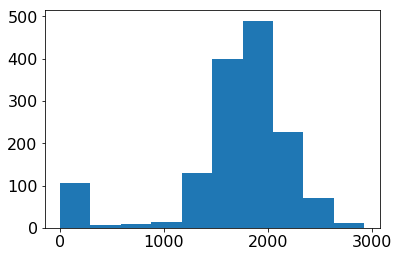

In [10]:
plt.hist(df_fltpairs['uu']['Nv'].values)

In [39]:
def plot_mwd( RA, Dec, c, org=0, ax=None, title='Mollweide projection', 
             projection='mollweide', marker='o', s=10, vmin=0, vmax=None, colorbar=True, cmap=plt.cm.viridis):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    
    Examples:
    >>> fig, ax = plt.subplots(1, 1, figsize=(8, 8), 
                            subplot_kw={'projection': 'mollweide'}); 
        plot_mwd(ax, x, y, c, title='') 
    '''
    if ax==None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8), 
                            subplot_kw={'projection': projection}); 
    if vmax is None:
        vmax = c.max()
    
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    # fig = plt.figure(figsize=(10, 5))
    # ax = fig.add_subplot(111, projection=projection, facecolor ='LightCyan')
    # ax = fig.add_subplot(111, projection=projection, facecolor ='honeydew')
    sc = ax.scatter(np.radians(x), np.radians(Dec), c=c, s=s,
                    marker=marker, vmin=vmin, vmax=vmax,
                    cmap=cmap)  # convert degrees to radians
    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)
    if colorbar:
        cbar = plt.colorbar(sc, ax=ax, orientation="horizontal")
        #cbar = plt.colorbar(sc, ax=ax, ticks=np.arange(vmin, vmax, (vmax-vmin)/3 ), orientation='horizontal')
        #cbar.ax.set_xticklabels(['Low', 'Medium', 'High'])  # horizontal colorbar
    return ax, cbar
    #cbar.set_clim(-2.0, 2.0)


def pix2radec(nside, ipix, degree=True):
    """from ipix to ra/dec"""
    
    theta, phi = hp.pix2ang(nside, ipix)
    ra = phi
    dec = np.pi/2. - theta
    if degree:
        ra = np.rad2deg(ra)
        dec = np.rad2deg(dec)
    return ra, dec

In [15]:
dbname = 'wfd_depth_scale0.99_v1.5_10yrs.db'
fltpair = 'uu'

df = dataRaw.loc[dbname][fltpair]

In [16]:
df.head()

,pixId,Dkl,FoM_i,Nv
0,1376,8.576503,0.025068,133
1,1377,8.575082,0.014723,78
2,1378,8.576038,0.014709,78
3,1379,8.399323,0.033078,147
4,1380,9.518718,0.005583,76


In [40]:
starDens = np.load('starDens16.npz')['starDens']



gr 1462 751
gr 751 145
gr 1428 939
gr 939 56
gr 1463 709
gr 709 138
gr 1462 1060
gr 1060 199


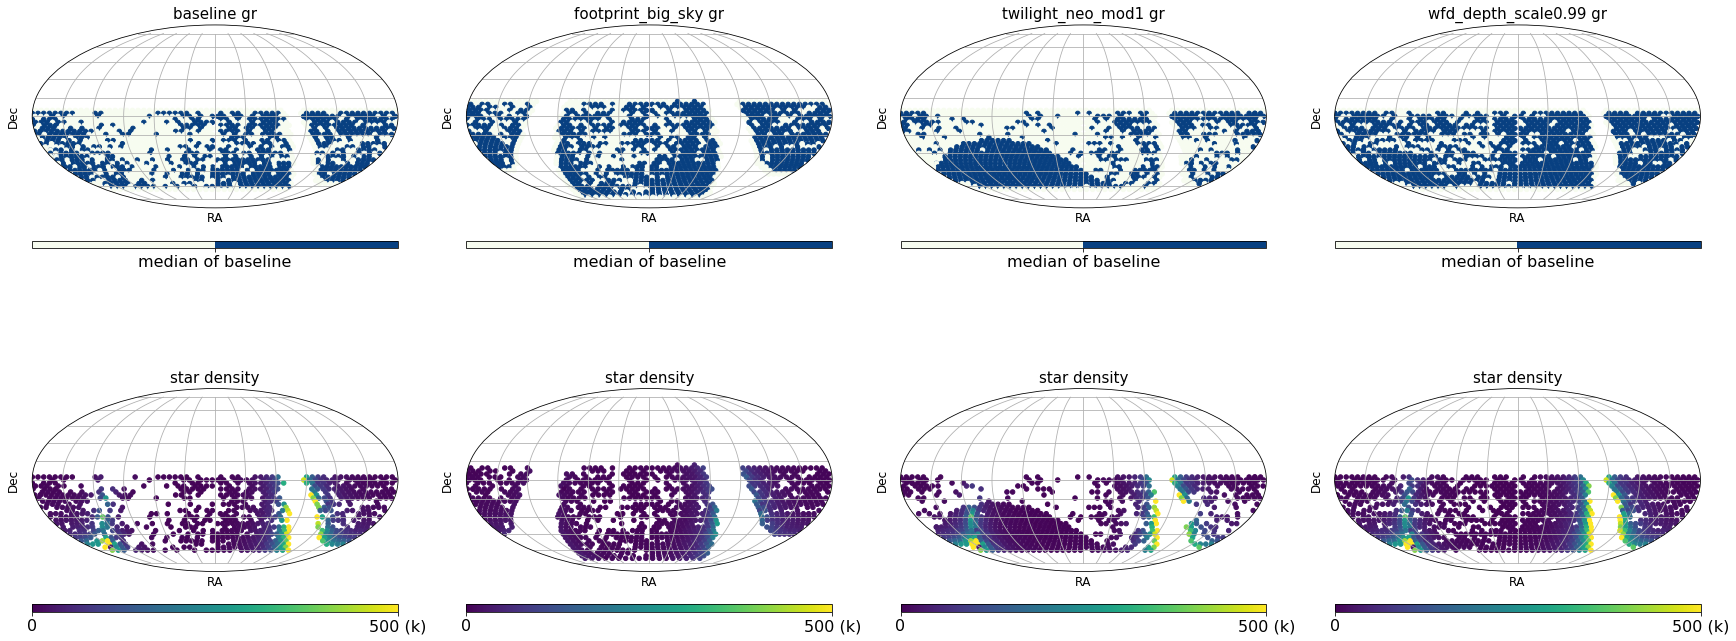

In [42]:
dbnames = [ 
     'baseline_v1.5_10yrs.db',
     'footprint_big_skyv1.5_10yrs.db', 
     'twilight_neo_mod1_v1.5_10yrs.db',
     'wfd_depth_scale0.99_v1.5_10yrs.db', 
     #'baseline_2snaps_v1.5_10yrs.db', 
     ]

fltpair = 'gr'

fig, axs = plt.subplots(2, len(dbnames), figsize=( 6*len(dbnames), 10), subplot_kw={'projection': 'mollweide'}, constrained_layout=True);

axs = axs.flatten()

for i, dbname in enumerate(dbnames):
    thres = Nvth[fltpair]
    
    df = dataRaw.loc[dbname][fltpair]
    
    idx = df.Nv >= thres

    ipix = df['pixId'].values 
    
    RA, Dec = pix2radec(nside=16, ipix=ipix)
    
    c = df['Nv'].values
    print(fltpair, len(c), len(c[c>=thres]))
    
    dbname = dbname.replace('_v1.5_10yrs.db', '').replace('v1.5_10yrs.db', '')
    ax, cbar = plot_mwd(RA, Dec, c, ax=axs[i], title=dbname +' '+fltpair, 
                        vmin=thres, vmax=thres+1, s=20,
                        cmap=plt.cm.get_cmap('GnBu', 2))
    ax.set_xticklabels([])     
    ax.set_yticklabels([]) 
    
    cbar.set_ticks([thres + .5])
    cbar.ax.set_xticklabels(['median of baseline'])
    
    # plot star density 
    ipix = ipix[ idx ]
    RA, Dec = pix2radec(nside=16, ipix=ipix)
    
    c = starDens[ipix] / 1000
    print(fltpair, len(c), len(c[c>=Nvth[fltpair]]))
    
    ax, cbar = plot_mwd(RA, Dec, c, ax=axs[i + len (dbnames) ], title='star density', 
                        vmin=0, vmax=500, s=20,
                        cmap=plt.cm.get_cmap('viridis', ))
    ax.set_xticklabels([])     
    ax.set_yticklabels([]) 
    
    cbar.set_ticks([0, 500])
    cbar.ax.set_xticklabels([0, '500 (k)'])

fig.savefig('figures/footprint_wfd.pdf')

gg 1460 1132
gg 1132 1132
gg 1460 200
gg 200 200
gg 1461 761
gg 761 760


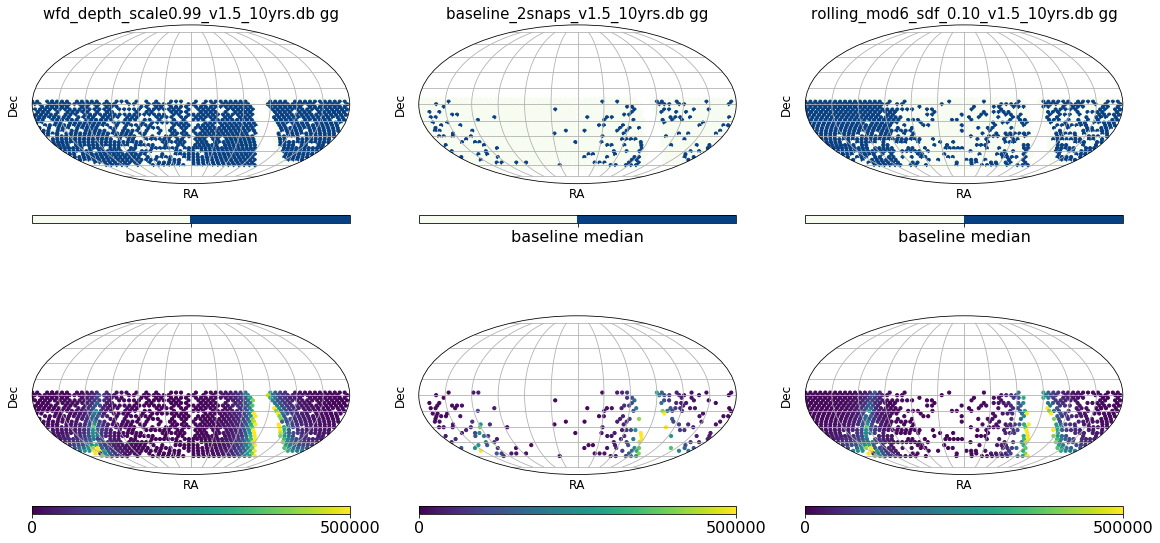

In [178]:
dbnames = [ 'wfd_depth_scale0.99_v1.5_10yrs.db', 
           'baseline_2snaps_v1.5_10yrs.db', 
           'rolling_mod6_sdf_0.10_v1.5_10yrs.db', ]

fltpair = 'gg'

fig, axs = plt.subplots(2, 3, figsize=(16, 8), subplot_kw={'projection': 'mollweide'}, constrained_layout=True);

axs = axs.flatten()

for i, dbname in enumerate(dbnames):
    thres = Nvth[fltpair]
    
    df = dataRaw.loc[dbname][fltpair]
    
    idx = df.Nv >= thres

    ipix = df['pixId'].values 
    
    RA, Dec = pix2radec(nside=16, ipix=ipix)
    
    c = df['Nv'].values
    print(fltpair, len(c), len(c[c>=Nvth[fltpair]]))
    
    ax, cbar = plot_mwd(RA, Dec, c, ax=axs[i], title=dbname +' '+fltpair, 
                        vmin=thres, vmax=thres+1, 
                        cmap=plt.cm.get_cmap('GnBu', 2))
    ax.set_xticklabels([])     
    ax.set_yticklabels([]) 
    
    cbar.set_ticks([thres + .5])
    cbar.ax.set_xticklabels(['baseline median'])
    
    # plot star density 

    ipix = ipix[ idx ]
    RA, Dec = pix2radec(nside=16, ipix=ipix)
    
    c = starDens[ipix]
    print(fltpair, len(c), len(c[c>=Nvth[fltpair]]))
    
    ax, cbar = plot_mwd(RA, Dec, c, ax=axs[i+3], title=None, 
                        vmin=0, vmax=500000, 
                        cmap=plt.cm.get_cmap('viridis', ))
    ax.set_xticklabels([])     
    ax.set_yticklabels([]) 
    
    cbar.set_ticks([0, 500000])
    #cbar.ax.set_xticklabels(['baseline median'])
    

uu 1459


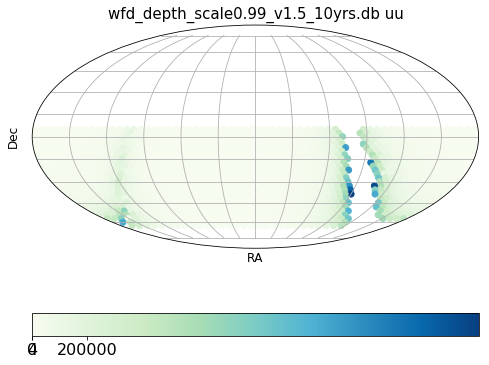

In [137]:

fig, axs = plt.subplots(1, 1, figsize=(8, 8), subplot_kw={'projection': 'mollweide'}, )#constrained_layout=True);

ax = axs
#dbname = dblist_all[3]
#df = dataraw['{}{}'.format(f0,f1)][dbname]
ipix = df['pixId'].values

RA, Dec = pix2radec(nside=16, ipix=ipix)

c = starDens[ipix]
print(fltpair, len(c))

ax, cbar = plot_mwd(RA, Dec, c, ax=ax, title=dbname +' '+fltpair, vmin=0, vmax=None, cmap=plt.cm.get_cmap('GnBu'))
ax.set_xticklabels([])     
ax.set_yticklabels([]) 

cbar.set_ticks([0, 200000, 4])
#cbar.ax.set_xticklabels(['th'])



others

In [189]:
#df_baseline = pd.DataFrame( dataRaw )
df_baseline = pd.read_pickle(outDir+'/tgaps_dataRaw_baseline_v1.5_10yrs.db.pkl')
df_baseline

,uu,ug,ur,ui,uz,uy,gg,gr,gi,gz,...,rr,ri,rz,ry,ii,iz,iy,zz,zy,yy
baseline_v1.5_10yrs.db,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv dT_lim 0 1376...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv ...,...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...


In [193]:
df_baseline.loc['baseline_v1.5_10yrs.db']['uu']

,pixId,Dkl,FoM_i,Nv,dT_lim
0,1376,9.215521,0.022682,228,"[2543.0299859689258, 2517.1657840843764, 25.86..."
1,1377,8.892487,0.020750,151,"[325.06176144188794, 2897.0894808574594, 3222...."
2,1378,8.835138,0.015281,105,"[1061.1107692982987, 1388.0824860240027, 2449...."
3,1379,9.081613,0.021610,190,"[681.1237290293211, 348.9774169290613, 332.146..."
4,1380,8.617415,0.018997,105,"[2155.1549509010947, 2155.2038098323683, 0.048..."
5,1381,9.150755,0.012631,119,"[1854.9268669024896, 350.0508093055905, 1504.8..."
6,1382,8.766766,0.008570,55,"[2159.0847757158335, 3275.009703620133, 1115.9..."
7,1383,8.834987,0.015137,104,"[330.0973442412942, 1799.0754751530185, 2129.1..."
8,1384,8.765199,0.029653,190,"[2499.2178868162446, 679.1726300520895, 1820.0..."
9,1385,8.704030,0.014767,89,"[34.98745522057288, 318.0949542224407, 353.082..."


In [195]:
tmin = 5/60/60/24 # in days
tmax = 3e8/60./60./24    
# histogram in log space
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
tmin = 5/60/60/24
tmax = 1.5/24 # 1.5 hour in days
bins_lin = np.linspace(tmin, tmax, 50)



In [197]:
def get_Dkl(values):
    '''kl divergence for histogram'''
    if values.any():
        values = values + 0.00001  # make each element non-zero
        prob = (values) / values.sum()  
    
        prob_uni = np.ones( len(prob) ) / len(prob)
        return np.sum( prob_uni * np.log(prob_uni / prob) )
    
    else:
        return np.NaN

def get_FoM_tgaps(df, tmin=0, tmax=1.5/24, bins=50):
    """return FoM from array of metricValues
    Inputs:
     df: pd.DataFrame, cols ['pixId', 'Dkl', 'FoM_i', 'Nv', 'dT_lim']
    """
    
    dT_all = np.concatenate(df.dT_lim.values)
    
    dT_tlim = dT_all[(dT_all>tmin)&(dT_all<tmax)] 
    Nv = len(dT_tlim)

    values, bins_ = np.histogram(dT_tlim, bins=bins);

    Dkl = get_Dkl(values)

    FoM = Nv * np.exp(-Dkl)
    
    return FoM



In [198]:
# prepare filter_dict
fltpairs = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy',
           'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy' ]

filter_dict = {}
for fltpair in fltpairs:
    filter_dict[fltpair] = {}
    dT = np.concatenate( df_baseline[fltpair]['baseline_v1.5_10yrs.db'] ['dT_lim'].values )
    filter_dict[fltpair]['dT'] = dT
    
    if fltpair[0]==fltpair[1]:
        bins = bins_log
        values, bins_ = np.histogram(dT, bins=bins);
    else:
        bins = bins_lin
        values, bins_ = np.histogram(dT, bins=bins);

    Dkl = get_Dkl(values)
    
    filter_dict[fltpair]['Dkl'] = Dkl
    print(fltpair, len(dT),  Dkl)
    

uu 2468080 5.398810362201651
ug 70578 2.1134440233740857
ur 66368 1.375961964396934
ui 9339 0.5016790761842163
uz 0 nan
uy 50 6.081792190269123
gg 5330741 5.312331831053857
gr 127608 1.6617405390844637
gi 24946 1.171693868930305
gz 987 0.43786301783702203
gy 494 0.61516906181712
rr 29186938 5.787795755226195
ri 180466 1.727938366489182
rz 14403 0.9063908925784445
ry 2043 0.40171911859405973
ii 29609453 6.215477775914526
iz 206627 1.8262000625825658
iy 38139 0.7669018018944066
zz 23694537 6.00344538601065
zy 174632 1.3822756018255706
yy 26094240 5.950768567363721


Text(0, 0.5, 'Nv (M)')

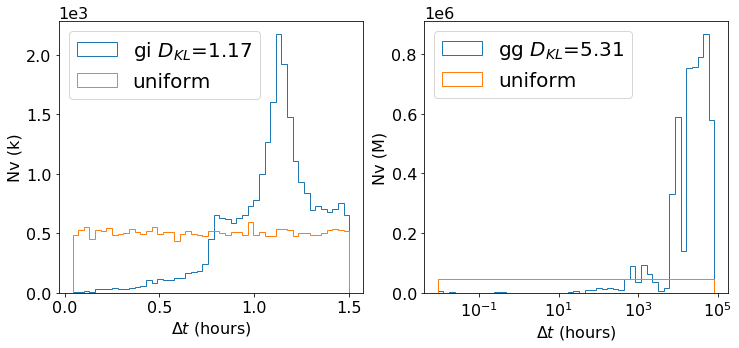

In [199]:
# plot a distribution with uniform one 

key = 'gi'
dT = filter_dict[key]['dT'] * 24
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

dkltex = '$D_{KL}$'
title = '{} {}={:.2f}'.format(key, dkltex, filter_dict[key] ['Dkl'])

uni = np.random.uniform(low=dT.min(), high=dT.max(), size=len(dT) )

bins_lin = np.linspace(dT.min(), dT.max(), 50)

ax = axs[0]
_ = ax.hist(dT, bins=bins_lin, label=title, 
                          cumulative=False, density=False, histtype='step' );
_ = ax.hist(uni, bins=bins_lin, label='uniform', alpha=1,
                          cumulative=False, density=False, histtype='step'  );
ax.legend(loc='upper left')
ax.set_xlabel('$\Delta t$ (hours)')
ax.set_ylabel('Nv (k)')
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0), )

# --------------------------
key = 'gg'
dT = filter_dict[key]['dT'] * 24

low = np.log(dT.min())
high = np.log(dT.max())
uni = np.power(10, np.random.uniform(low=low, high=high, size=len(dT) ) )

title = '{} {}={:.2f}'.format(key, dkltex, filter_dict[key] ['Dkl'])


tmin = dT.min()
tmax = dT.max()
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)

ax = axs[1]
_ = ax.hist(dT, bins=bins_log, label=title, 
                          cumulative=False, density=False, histtype='step' );

_ = ax.hist(uni, bins=bins_log, label='uniform', alpha=1,
                          cumulative=False, density=False, histtype='step'  );
ax.set_xscale('log')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), )
ax.legend(loc='upper left')
ax.set_xlabel('$\Delta t$ (hours)')
ax.set_ylabel('Nv (M)')

# fig.suptitle(title)